# Predicting Heart Disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a person has heart disdease on their medical attributes.

We're going to take the following approach :
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient , can we predict whether or not they have heart disease ?

## 2. Data 

The original data came from the CLeveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

A similar version of dataset is also available on Kaggle , the columns of 'id' & 'origin' are excluded here.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we'll pursue the project.

## 4. Features 

This is where you'll get different information about each of the featues in your data. You can do this via doing your own research (such as looking at the links above ) or by talking to a subject matter expert (someone who knows about the dataset).

**Create a data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
  * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
  * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
   * looks at stress of heart during excercise
   * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
  * 0: Upsloping: better heart rate with excercise (uncommon)
  * 1: Flatsloping: minimal change (typical healthy heart)
  * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
  * colored vessel means the doctor can see the blood passing through
  * the more blood movement the better (no clots)
13. thal - thalium stress result
  * 1,3: normal
  * 6: fixed defect: used to be defect but ok now
  * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use Pandas , NumPy and Matplotlib for data analysis and manipulation.

In [1]:
# Importing all the tools we need

# Regular EDA ( exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside our notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("Heart-disease-data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape # (rows,columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA )

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What's missing from the data and how can you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add , change or remove features to get more out of your data ?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Let's find out how many of each class are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

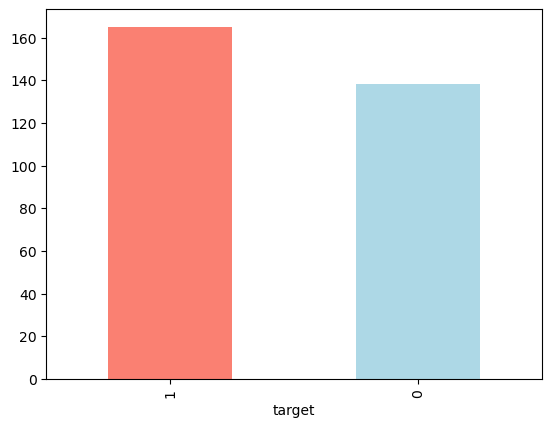

In [6]:
#Visualizing the data
df["target"].value_counts().plot(kind = "bar", color = ["salmon" , "lightblue"]);

In [7]:
#Information about the other columns in the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#To specifically check whether there are any missing values or not
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#This gives us certain numerical values on all of our columns 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


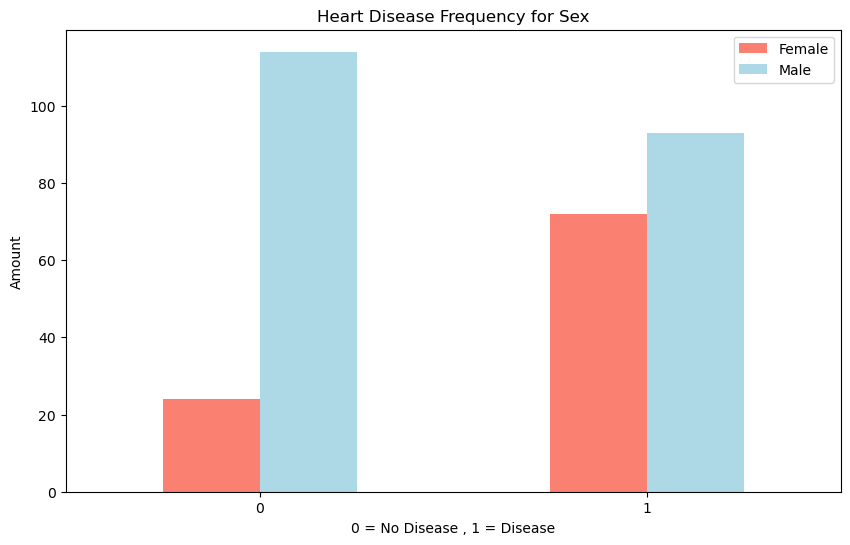

In [12]:
# Create a plot for crosstab
pd.crosstab(df.target,df.sex).plot(kind = "bar",
                                   figsize =(10,6),
                                   color = ["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0); #This puts the 0 & 1 in the x-axis straight

### Age vs. Max Heart Rate for heart disease

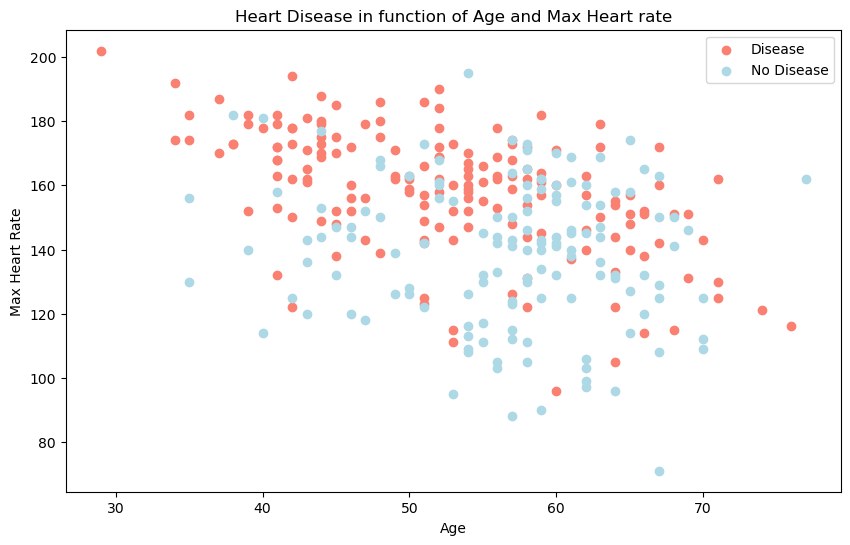

In [13]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

#Scatter with negeative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

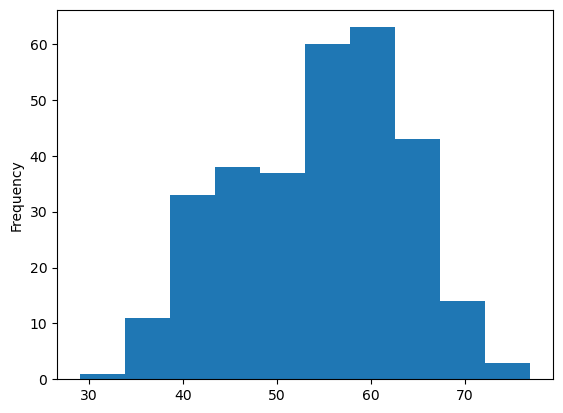

In [14]:
#Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart disease frequency per chest pain type 
cp - chest pain type

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


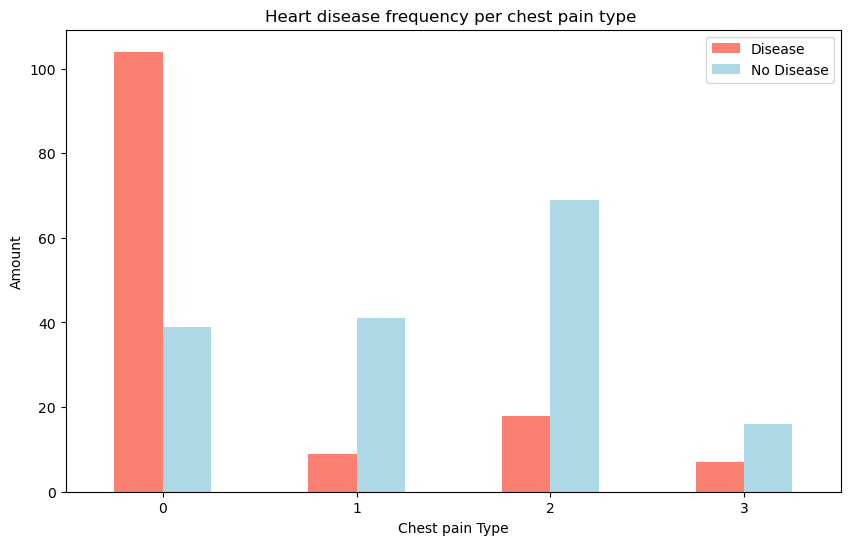

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
#Adding some helpful info 
plt.title("Heart disease frequency per chest pain type ")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["Disease","No Disease"])
plt.xticks(rotation=0);

In [17]:
# Make a correlation matrix
#This compares all the values of the columns to each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [18]:
print(sns.__version__)

0.13.2


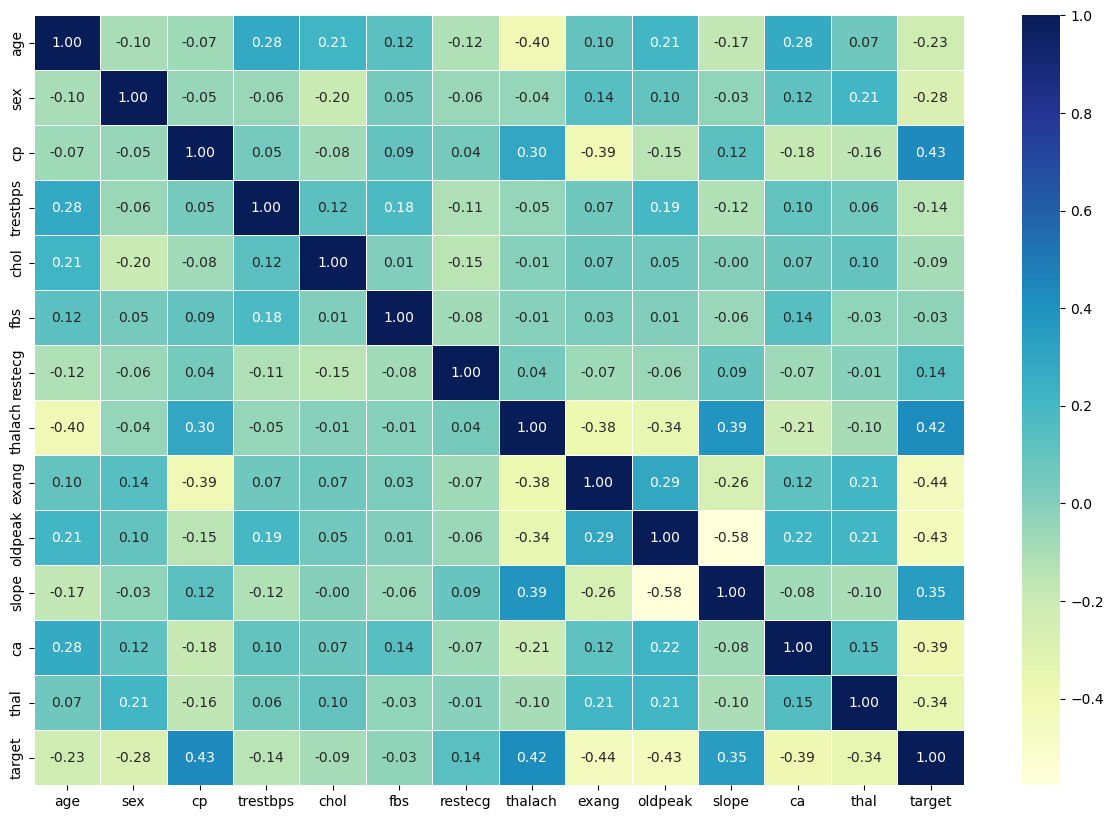

In [19]:
#The installed version of seaborn is a previous version , so it's showing only tht first row
#In the actual case , it should show all the values of rows and columns
#Let's make our correlation matrix more prettier

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
plt.show();

**Positive Correlation - When there is a positive correlation between two columns in a df , this means as the values in one of the column increases then the values in the other column also starts increasing along with it**

**Negative Correlation - A relation between two variables in which one variable increases as the other decreases**

### 5. Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
#Split the data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
#Split into train and test split
np.random.seed(69)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Now we've got our data split into training and test sets , it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try three different machine learning models :
1. Logistic Regression (Despite its name , it is a model used for classification models)
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [25]:
#Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

#Create a function to fit and score models 
def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models 
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    #Set Random Seed
    np.random.seed(69)
    #make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name,model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [26]:
#We've already found the values of X_train,X_test,y_train,y_test using train_test_split
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\abhig\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Random Forest Classifier': 0.8688524590163934}

## Model Comparison

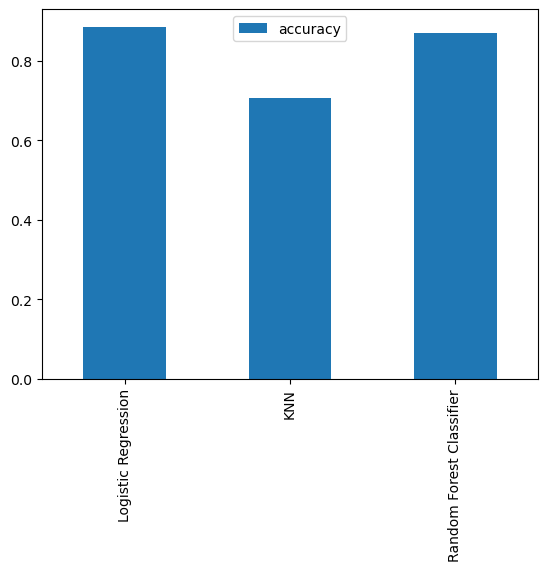

In [27]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
#Here , the T stands for transpose , we're doing it because otherwise it would not look much good
model_compare.T.plot.bar();

Now we've got a baseline model...and we know a model's first predictions aren't always what we should base our next steps off. What should we do ?

Let's look at the following :
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation 
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

## Hyperparameter Tuning (by hand)

In [28]:
# Let's tune KNN
train_scores = []
test_scores = []

#Create a list of different values for n_neighbours
neighbours = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through n_neighbors
for i in neighbours:
    knn.set_params(n_neighbors = i)

    #Fit the algorithm
    knn.fit(X_train,y_train)

    #Update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [29]:
train_scores

[1.0,
 0.8181818181818182,
 0.78099173553719,
 0.7727272727272727,
 0.756198347107438,
 0.768595041322314,
 0.71900826446281,
 0.7272727272727273,
 0.71900826446281,
 0.7231404958677686,
 0.7148760330578512,
 0.7148760330578512,
 0.7066115702479339,
 0.6859504132231405,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6776859504132231,
 0.6818181818181818,
 0.6818181818181818]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.6557377049180327,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327]

Maximum KNN score on the test data: 72.13%


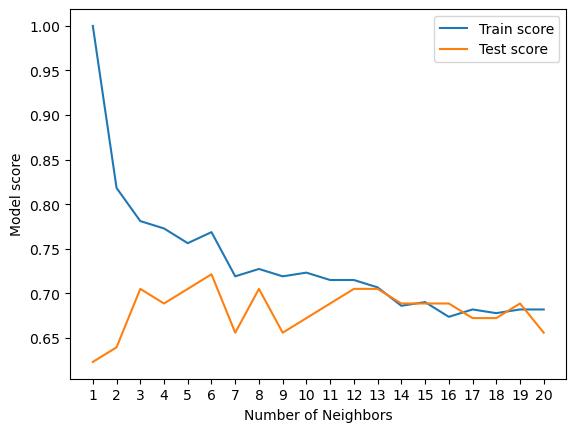

In [31]:
plt.plot(neighbours,train_scores,label = "Train score")
plt.plot(neighbours,test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))  #For putting the values of measurements in x-axis as 1 to 20
plt.xlabel("Number of Neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

* In the above process , it is seen that kneighborsclassifer was tuned , but its score is still much less than that of other two classifiers , so we might discard it.
* Also note , that in the previous example we ran loops in order to tune the hyperparameters of the classifier , but this is a tedious & complex process , so there is no need to follow it.
* We would tune our hyperparameters with randomizedsearchcv or gridsearchcv as we did earlier in scikit-learn.

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune :
* Logistic Regression ()
* RandomForestClassifier ()

...using RandomizedSearchCV

In [32]:
#In this part , several hyperparameter constraints are given in a range , it is not given in a list form.
#This is so because , the tuning works well on uniformly distributed values.
#A list can be used but a range is preferred more.

#Create a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}
#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models , let's tune them using RandomizedSearchCV...

In [33]:
#Tune LogisticRegression
np.random.seed(69)
#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [35]:
rs_log_reg.score(X_test,y_test)

0.8688524590163934

Now we've tuned logistic regression , let's do the same for RandomForestClassifier...

In [36]:
#Setup random seed
np.random.seed(69)

#Setup random hyperparameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

#Fit the hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)                                 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
#Find the best parameters 
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': None}

In [38]:
#Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV

Since our logistic regression model , provides the best score so far , we'll try to improve it further using GridSearchCV...

In [39]:
#Different hyperparameters for our LogiscticRegression model
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegressioN
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#Fit grid hyperparameter search model 
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [40]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [41]:
#Evaluate the model
gs_log_reg.score(X_test,y_test)

0.8688524590163934

##  Evaluating our tuned machine learning classifier , beyond accuracy

* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Prrecision
* Recall 
* F1-score

...and it would be great if cross-validation was used wherever possible.

To make comparisons and evaluate our trained model , first we need to make predictions .

In [42]:
#Make predictions with our tuned model
y_preds = gs_log_reg.predict(X_test)

In [43]:
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

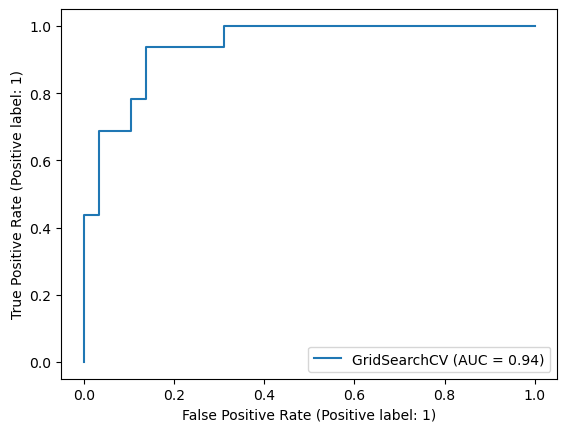

In [44]:
#Import ROC Curve function form sklearn.metrics (already done above)
#Plot ROC Curve and calculate AUC metric (this is using the from_estimator method)
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

In [45]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 4 28]]


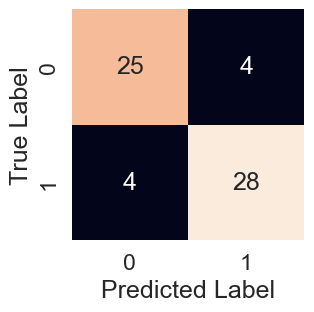

In [46]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test,y_preds)   

Now we've got a ROC curve , AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1 score.

In [47]:
#Note that this classification report is only based on one dataset , it's not cross-validated
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy,precision,recall & f1-score of our model using cross-validation and to do so we'll be using "cross_val_score()".

In [49]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [50]:
# Create a new classifier using best parameters 
clf = LogisticRegression(C = 0.7278953843983146 , solver = "liblinear")

In [54]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
np.mean(cv_acc)

0.8182513661202186

In [58]:
#Cross-validated precision
cv_prec = cross_val_score(clf,X,y,cv=5,scoring="precision")
np.mean(cv_prec)

0.8138514802551555

In [59]:
#Cross-validated recall
cv_rec = cross_val_score(clf,X,y,cv=5,scoring="recall")
np.mean(cv_rec)

0.8727272727272727

In [60]:
#Cross-validated f1-score
cv_f1score = cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_f1score)

0.8408267145594746

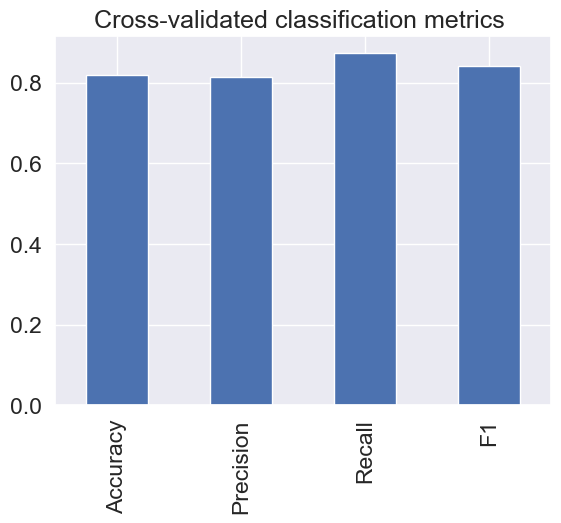

In [64]:
#Visualizing our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc),
                          "Precision": np.mean(cv_prec),
                          "Recall": np.mean(cv_rec),
                          "F1": np.mean(cv_f1score)},
                         index=[0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics ",
                      legend = False);

### Feature Importance

Feature importance is another way of asking , "which features contributed most to the outcome of the model and how did they contribute ? "

Finding feature importance is different for each machine learning model. One way to find out the feature importance is to search for "(MODEL NAME) feature importance ".

Let's find the feature importance for our logistic regression model...

In [65]:
# Fit an instance of logisticRegression
gs_log_reg.best_params_
clf = LogisticRegression(C = 0.7278953843983146 , solver = "liblinear")
clf.fit(X_train,y_train);


* This tells us how much an independent variable , affects our dependent variable, here 'target'
* The no. of elements in the coef array is equal to the no. of columns in the actual dataset

In [66]:
#Check coef_
clf.coef_

array([[ 0.01200643, -1.3201306 ,  0.79768101, -0.01751518, -0.00332526,
         0.00185963,  0.47704722,  0.03003419, -0.65566892, -0.54979237,
         0.44631411, -0.73948987, -0.69915971]])

Here , we are mapping each of the coefficients of the columns to their values & zipping them up together 

In [67]:
# match coef's features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.012006428502712094,
 'sex': -1.320130600141411,
 'cp': 0.7976810054508425,
 'trestbps': -0.017515179980049127,
 'chol': -0.0033252590695428564,
 'fbs': 0.0018596345335609114,
 'restecg': 0.4770472230935033,
 'thalach': 0.030034189399978775,
 'exang': -0.65566892237306,
 'oldpeak': -0.5497923712744314,
 'slope': 0.4463141111553666,
 'ca': -0.7394898744129841,
 'thal': -0.6991597073342894}

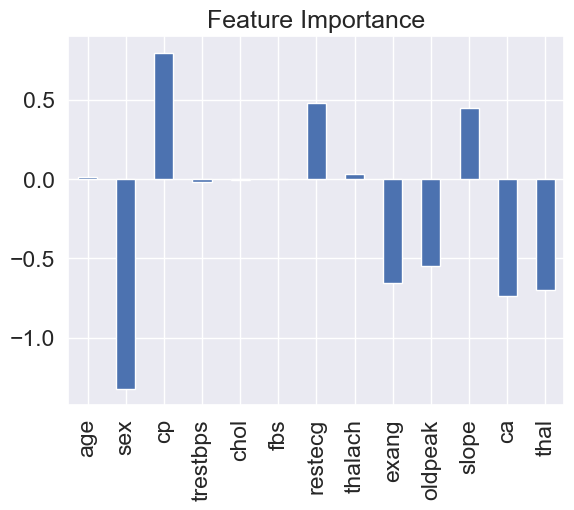

In [69]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [70]:
#Comparing two columns from the dataset , and judging their correlation
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your data metric yet... ask yourself...

* Could you collect more data ?
* Could you try a better model ? Like CatBoost or XGBoost ?
* Could we improve the current models ? (beyond what we have done so far)
* If your model is good enough (you have hit the evalution metric) , how would you export it and share it with others ? 